# HW2

Conduct data analysis for a clinical trial.

The clinical trial study is from https://www.nejm.org/doi/10.1056/NEJMoa1605949?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200www.ncbi.nlm.nih.gov

Based on the dataset, we will try to reproduce some of the results reported in the paper.


# Data loading
We have two tables to be used, namely
- `data_clinical_patient.txt`: the patient clinical data
- `data_mutations.txt`: the gene mutation data
- `data_clinical_sample.txt`: the patient's sample data

In [3]:
import os
data_dir = "./data/mnm_washu_2016"

In [4]:
import pandas as pd
df_clinical = pd.read_csv(os.path.join(data_dir, "data_clinical_patient.txt"), sep="\t", skiprows=4)
df_clinical

FileNotFoundError: [Errno 2] No such file or directory: './data/mnm_washu_2016/data_clinical_patient.txt'

In [ ]:
df_mutation = pd.read_csv(os.path.join(data_dir, "data_mutations.txt"), sep="\t")
df_mutation

In [ ]:
df_sample = pd.read_csv(os.path.join(data_dir, "data_clinical_sample.txt"), sep="\t", skiprows=4)
df_sample

# Q1.

What is the disease distribution of the involved patients from different sources? Save the output as a dataframe `output_df`, which has three columns:
- `SOURCE`: the sources of the patient
- `DISEASE`: the diseases of the patient
- `count`: the number of patients in the group

In [5]:
# output_df = ...

# ##############
# your code starts here
# Answer
# ##############

In [6]:
###### testing script ######
assert len(output_df) == 6
assert len(output_df.columns) == 3
assert output_df[output_df["SOURCE"] == "WashU_on_study"]["count"].sum() == 84
############################

# Q2
Select the patients who have the baseline ECOG performance score lower than 1 and what is the distribution of the number of treatment cycles they completed?

Save the output as a dataframe `output_df`, which has three columns:
- `CYCLES_COMPLETED`: the number of completed treatment cycles
- `count`: the number of patients in the group

In [7]:
# output_df = ...

# ##############
# your code starts here
# Answer

# ##############

In [8]:
###### testing script ######
assert len(output_df) == 13
assert len(output_df.columns) == 2
assert output_df[output_df["CYCLES_COMPLETED"] == 7]['count'].values == 5
############################

# Q3 
How many patients are with TP53 mutatations? Save the answer in variable `n`.

In [9]:
# n = ...

# ##############
# your code starts here
# Answer

# ##############

In [10]:
###### testing script ######
assert n == 20
############################

# Q4

How many patients get complete remission, complete remission with incomplete count recovery, overall response, respectively?

Return your output in variables:
- `n_cr`: number of patients with complete remission
- `n_cri`: number of patients with complete remission (with incomplete count recovery)
- `n_or`: number of patients with overall response

In [11]:
# ##############
# your code starts here
# Answer

############################

In [12]:
###### testing script ######
assert n_cr == 15
assert n_cri == 24
assert n_or == 39
############################

# Q5. Distribution of Response by Age of Diagnosis

Using the clinical outcome data, visualize the distribution of response by age at diagnosis across patients. Focus on the following three response groups:
- Group1: Patients with complete remission or complete remission with incomplete count recovery.
- Group2: Patients with partial response or stable disease.
- Group3: Patients with progressive disease or not evaluable.

Create a categorical scatterplot using `seaborn.stripplot` to illustrate these distributions.

Output Requirements:
1. A scatterplot showing the age of diagnosis for each of the three response groups.
2. Use `seaborn.stripplot` to create the plot.
3. Ensure that the plot is clear and properly labeled.
4. Return the mean age of diagnosis for the three group: `mean_age1`, `mean_age2`, `mean_age3` for the above three groups, respectively.

Write the code to generate this visualization.

/tmp/ipykernel_18621/2946289421.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=filtered_df, x='Response Group', y='AGE_AT_DIAGNOSIS', jitter=True, palette='Set2')


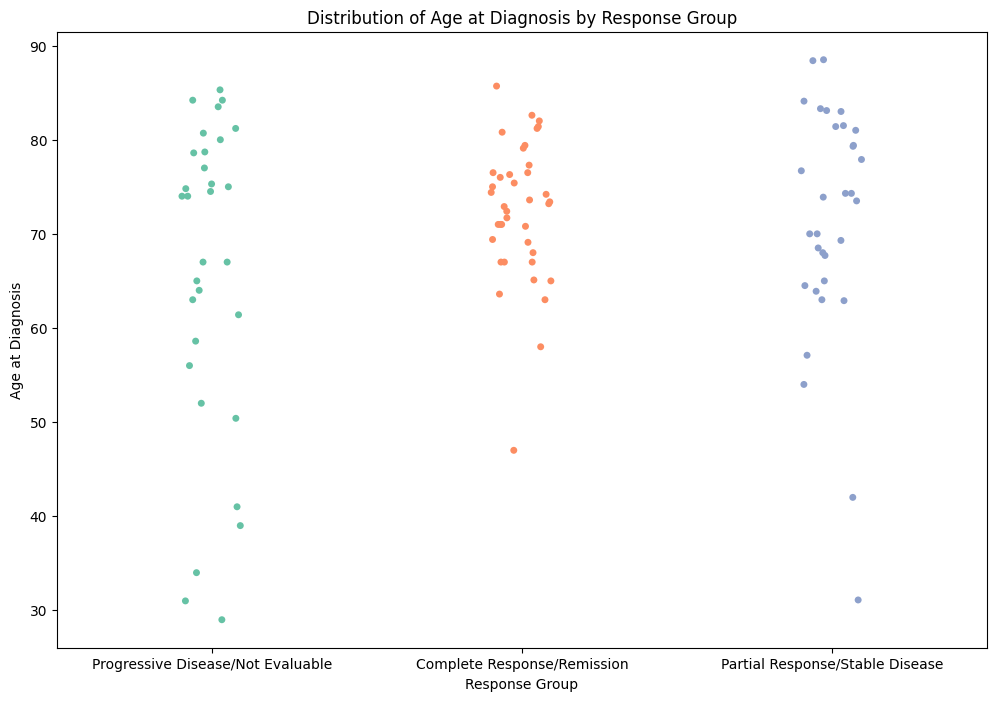

In [13]:
# ##############
# your code starts here
# Answer

# ##############

In [14]:
###### testing script ######
assert round(mean_age1,2) == 72.41
assert round(mean_age2, 2) == 71.27
assert round(mean_age3, 2) == 65.79
############################

# Q6. Distribution of Response by number of cycles of completed

Using the clinical outcome data, visualize the distribution of response by number of cycles completed across patients. Focus on the following three response groups:
- Group1: Patients with complete remission or complete remission (with incomplete count recovery).
- Group2: Patients with partial response or stable disease.
- Group3: Patients with progressive disease or not evaluable.

Create a bar plots where the x-axis is the group and y-axis is the median number of cycles of completed with the 95% confidence interval error bars.

Return the mean of cycle completed for the three groups: `mean_c1`, `mean_c2`, `mean_c3` for the above three groups, respectively.


/tmp/ipykernel_18621/3079625482.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=filtered_df, x='Response Group', y='CYCLES_COMPLETED', ci=95, palette='Set2')
/tmp/ipykernel_18621/3079625482.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='Response Group', y='CYCLES_COMPLETED', ci=95, palette='Set2')


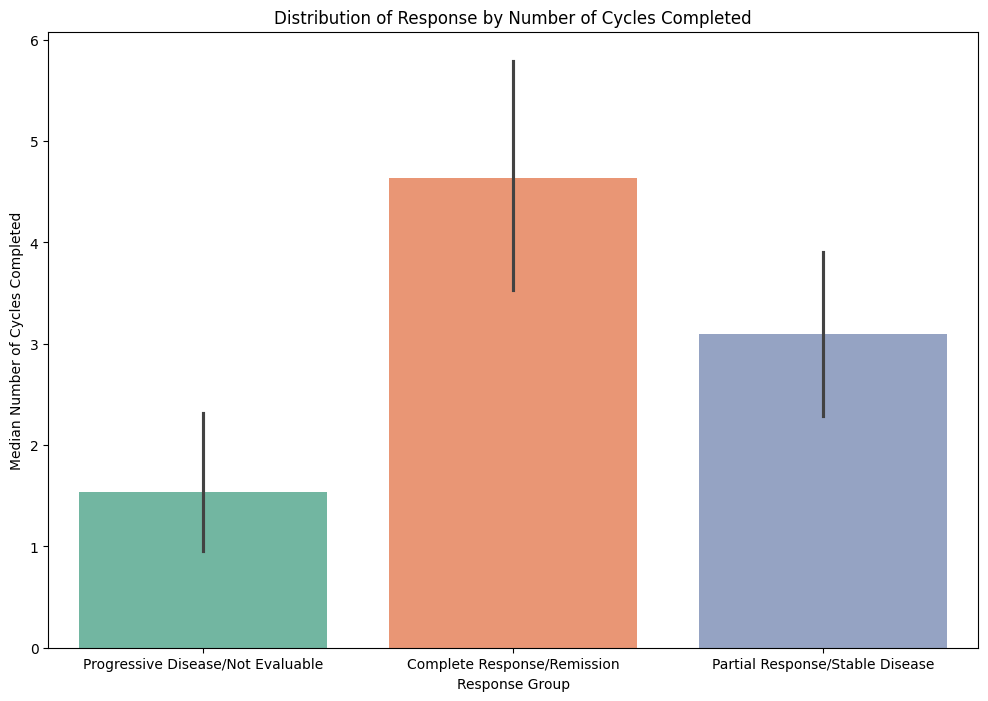

In [15]:
# ##############
# your code starts here
# Answer

# ##############

In [16]:
###### testing script ######
assert round(mean_c1, 2) == 4.63
assert round(mean_c2, 2) == 3.10
assert round(mean_c3, 2) == 1.53
# ##############

## Q7. Pairwise Statistical Test

Using the clinical outcome data, perform a statistical analysis on the number of cycles completed across different patient response groups. The analysis should focus on three specific response groups:
- Group1: Patients with complete response or complete remission (incomplete count recovery).
- Group2: Patients with partial response or stable disease.
- Group3: Patients with progressive disease or not evaluable.

Conduct pairwise comparisons for these groups using Tukey’s Honest Significant Difference (HSD) test, with an alpha level of 0.05, utilizing the `statsmodels` library.

Output Requirement:
- Return a list of p-values for the comparisons between:
  - Group1 vs. Group2
  - Group1 vs. Group3
  - Group2 vs. Group3

This list should be named `pvalues`.

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
             group1                           group2              meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------
    Complete Response/Remission   Partial Response/Stable Disease  -1.5348 0.0803  -3.213  0.1434  False
    Complete Response/Remission Progressive Disease/Not Evaluable  -3.0982 0.0001 -4.7918 -1.4047   True
Partial Response/Stable Disease Progressive Disease/Not Evaluable  -1.5634 0.0961 -3.3394  0.2125  False
--------------------------------------------------------------------------------------------------------


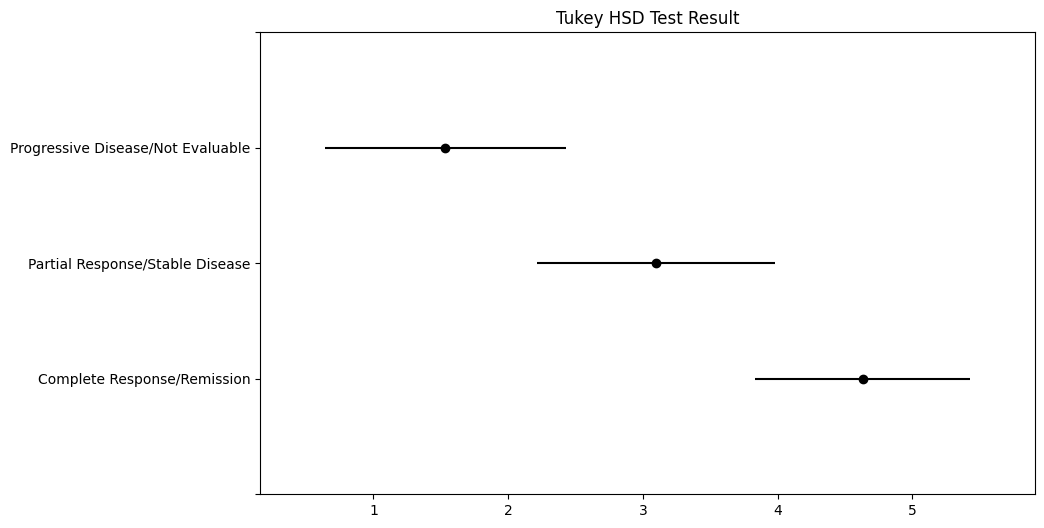

array([8.02994260e-02, 9.80877158e-05, 9.60571367e-02])

In [17]:
# ##############
# your code starts here
# Answer
# pvalues = ...


# ##############

In [18]:
###### testing script ######
generated_pvals = [round(p,4) for p in pvalues]
assert generated_pvals == [0.0803, 0.0001, 0.0961]
# ##############

# Q8. Correlation between Somatic Mutations and Clinical Responses
For mutated genes TP53, SRSF2, RUNX1, TET2, and IDH2, show the proportion of patients who had and had not a response (complete remission, complete remission with incomplete count recovery, or morphologic complete remission).

Return a pd.DataFrame named `output_df` with three columns:
- `Gene`: name of the gene
- `Proportion Response`: proportion of patients with response
- `Proportion No Response`: proportion of patients without response

In [19]:
# ##############
# your code starts here
# Answer
# output_df = ...

# ##############

MORPHOLOGIC_RESPONSE,Gene,Proportion Response,Proportion No Response
0,TP53,1.000000,0.000000
1,SRSF2,0.315789,0.684211
2,RUNX1,0.300000,0.700000
3,TET2,0.333333,0.666667
4,IDH2,0.312500,0.687500


In [20]:
###### testing script ######
output_df = output_df.set_index("Gene")
assert output_df.loc["TP53"]["Proportion Response"] == 1
assert output_df.loc["TP53"]["Proportion No Response"] == 0
assert output_df.loc["RUNX1"]["Proportion No Response"] == 0.7
# ##############

In [21]:
df_sample

,SAMPLE_ID,PATIENT_ID,GENE_PANEL,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,mnm_washu_2016_1001-1,mnm_washu_2016_1001,Enhanced exome,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.433333
1,mnm_washu_2016_1002-1,mnm_washu_2016_1002,Enhanced exome,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.500000
2,mnm_washu_2016_1002-2,mnm_washu_2016_1002,AmpliSeq,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.033333
3,mnm_washu_2016_1003-1,mnm_washu_2016_1003,Enhanced exome,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.400000
4,mnm_washu_2016_1004-1,mnm_washu_2016_1004,Enhanced exome,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.300000
...,...,...,...,...,...,...,...,...
131,mnm_washu_2016_1083-1,mnm_washu_2016_1083,No Sequencing Done,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.000000
132,mnm_washu_2016_PPI023-1,mnm_washu_2016_PPI023,No Sequencing Done,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.000000
133,mnm_washu_2016_PPI025-1,mnm_washu_2016_PPI025,No Sequencing Done,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.000000
134,mnm_washu_2016_548417-1,mnm_washu_2016_548417,No Sequencing Done,MNM,"Blood Cancer, NOS",Myeloid Neoplasm,Matched,0.000000


# Q9. Correlation Between Biomarkers and Survival

Utilize the Cox proportional hazards model to determine the two most influential factors affecting survival from a set of given clinical data variables. Focus your analysis on the following factors:

- "SEX"
- "AGE_AT_DIAGNOSIS"
- "PERIPHERAL_BLOOD_WBC"
- "PERIPHERAL_BLASTS_PERCENTAGE"
- "TRANSPLANT"

The dataset `df_clinical` includes the variables above along with "OS_MONTHS" (overall survival in months) and "OS_STATUS" (status at the end of observation). Convert categorical variables to a suitable format for modeling, handle any missing data appropriately, and fit the Cox model.

Output Requirement:
- Return a list named `factors` containing the names of the top two factors with the highest impact on survival, determined by the magnitude of their coefficients in the Cox model.

Instructions:
1. Preprocess the data:
   - Convert the "SEX" and "TRANSPLANT" variables to numeric using appropriate encoding.
   - Ensure "OS_STATUS" is appropriately formatted as a binary indicator.
   - Drop NaN values.
2. Fit the Cox proportional hazards model using "OS_MONTHS" as the duration and "OS_STATUS" as the event indicator.
3. Extract and list the two most influential factors based on the model's coefficients.

In [22]:
# ##############
# your code starts here
# Answer
# factors = ...
# pip install lifelines

# ##############

/tmp/ipykernel_18621/733525316.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SEX"] = OrdinalEncoder().fit_transform(df[["SEX"]])
/home/ZF/miniconda3/envs/trialmind/lib/python3.10/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


['SEX', 'TRANSPLANT']

In [23]:
###### testing script ######
assert len(factors) == 2
assert all(factor in df.columns.tolist() for factor in factors)
# ##############

## Q10. Correlation Between Stem-Cell Transplantation and Survival

Using clinical data, analyze the impact of stem-cell transplantation on patient survival. Perform the following tasks:

1. **Visualize Survival Curves**:
   - Create survival curves for two patient groups: those who have undergone stem-cell transplantation and those who have not.
   - Label the curves appropriately and ensure the graph includes titles and axis labels for clarity.

2. **Statistical Analysis**:
   - Conduct a log-rank test to compare the survival distributions between the two groups.
   - Store the p-value of the test in a variable named `pvalue`.

Ensure the survival time is measured from the `OS_MONTHS` column, and the event status (whether the event has occurred) is determined from the `OS_STATUS` column.

Provide the code to generate the survival curves, perform the log-rank test, and output the `pvalue`.

/home/ZF/miniconda3/envs/trialmind/lib/python3.10/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/ZF/miniconda3/envs/trialmind/lib/python3.10/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


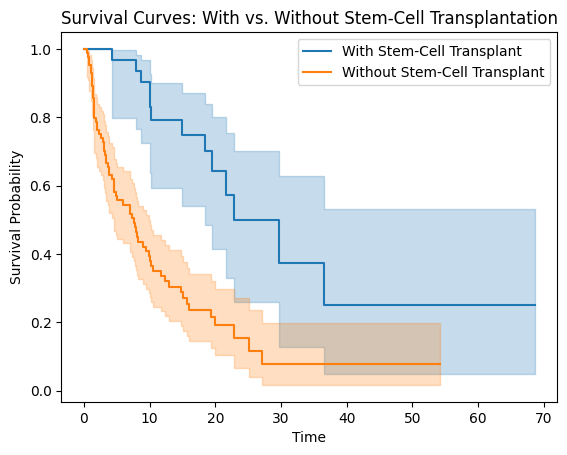

In [25]:
# ##############
# your code starts here
# Answer
# pvalue = ...


In [30]:
###### testing script ######
assert isinstance(pvalue,float)
assert pvalue < 5e-5
assert pvalue > 0
# ##############